In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import copy
import matplotlib.cm as cm
import matplotlib.colors as mcolors

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
rna_df = pd.read_csv('../../../data/TCGA-LIHC/clean/TCGA-LIHC_tpm_protein_coding_clean.csv', sep=',', index_col=0, header=0)
rna_df = rna_df.loc[['KLRB1'], :]
rna_df

,TCGA-G3-A25X-01A-11R-A16W-07,TCGA-DD-AADS-01A-11R-A41C-07,TCGA-G3-AAV3-01A-11R-A37K-07,TCGA-T1-A6J8-01A-11R-A32O-07,TCGA-2Y-A9GU-01A-11R-A38B-07,TCGA-2Y-A9HB-01A-11R-A39D-07,TCGA-DD-A73E-01A-12R-A32O-07,TCGA-EP-A3RK-11A-11R-A22L-07,TCGA-UB-A7MB-01A-11R-A33R-07,TCGA-DD-A73A-01A-12R-A32O-07,TCGA-DD-AAEG-01A-11R-A39D-07,TCGA-ED-A8O6-01A-11R-A36F-07,TCGA-G3-AAV7-01A-11R-A38B-07,TCGA-DD-A1EJ-11A-11R-A155-07,TCGA-BC-A216-11A-11R-A155-07,TCGA-CC-A7IJ-01A-11R-A33R-07,TCGA-DD-A114-11A-12R-A131-07,TCGA-2Y-A9H9-01A-21R-A39D-07,TCGA-CC-5261-01A-01R-A131-07,TCGA-RC-A7SH-01A-11R-A38B-07,TCGA-BC-A10T-11A-11R-A131-07,TCGA-DD-A1EI-01A-11R-A131-07,TCGA-G3-A3CJ-01A-11R-A213-07,TCGA-BC-A10U-11A-11R-A131-07,TCGA-FV-A2QR-11A-11R-A213-07,TCGA-GJ-A9DB-01A-11R-A37K-07,TCGA-ED-A7PY-01A-11R-A33R-07,TCGA-DD-A3A4-11A-11R-A22L-07,TCGA-K7-A5RG-01A-11R-A28V-07,TCGA-G3-A7M5-01A-11R-A33R-07,TCGA-DD-AADN-01A-11R-A41C-07,TCGA-CC-A8HS-01A-11R-A36F-07,TCGA-WQ-AB4B-01A-11R-A41C-07,TCGA-FV-A23B-01A-11R-A16W-07,TCGA-FV-A3R3-01A-11R-A22L-07,TCGA-G3-AAV0-01A-11R-A37K-07,TCGA-5C-A9VG-01A-11R-A37K-07,TCGA-BC-4072-01B-11R-A155-07,TCGA-DD-AAVV-01A-11R-A41C-07,TCGA-DD-AADB-01A-11R-A41C-07,TCGA-DD-AAVQ-01A-11R-A41C-07,TCGA-CC-5258-01A-01R-A131-07,TCGA-EP-A3JL-01A-11R-A213-07,TCGA-DD-A73C-01A-12R-A33J-07,TCGA-G3-AAV1-01A-11R-A38B-07,TCGA-DD-AAEE-01A-11R-A41C-07,TCGA-G3-A25T-01A-11R-A16W-07,TCGA-LG-A9QC-01A-11R-A37K-07,TCGA-ED-A82E-01A-11R-A352-07,TCGA-DD-AACF-01A-11R-A41C-07,TCGA-QA-A7B7-01A-11R-A32O-07,TCGA-DD-AAC9-01A-11R-A41C-07,TCGA-DD-AAE6-01A-11R-A41C-07,TCGA-DD-A3A2-01A-11R-A213-07,TCGA-DD-A39Y-01A-11R-A213-07,TCGA-BC-A112-01A-11R-A131-07,TCGA-ZP-A9CZ-01A-11R-A38B-07,TCGA-CC-A3MB-01A-11R-A213-07,TCGA-DD-AAE1-01A-11R-A41C-07,TCGA-DD-A3A5-11A-11R-A22L-07,TCGA-EP-A3RK-01A-11R-A22L-07,TCGA-G3-A3CG-01A-11R-A213-07,TCGA-DD-AA3A-01A-11R-A37K-07,TCGA-BC-4073-01B-02R-A131-07,TCGA-DD-AACK-01A-11R-A41C-07,TCGA-DD-A39X-11A-11R-A213-07,TCGA-XR-A8TE-01A-11R-A36F-07,TCGA-G3-A25V-01A-11R-A16W-07,TCGA-DD-A4NA-01A-11R-A266-07,TCGA-DD-AAD3-01A-11R-A41C-07,TCGA-DD-A118-01A-11R-A131-07,TCGA-DD-A39V-11A-11R-A213-07,TCGA-ED-A459-01A-11R-A266-07,TCGA-RC-A7SB-01A-21R-A352-07,TCGA-WQ-A9G7-01A-11R-A37K-07,TCGA-DD-AAEA-01A-11R-A41C-07,TCGA-G3-A7M7-01A-12R-A352-07,TCGA-FV-A3R2-11A-11R-A22L-07,TCGA-BC-A10T-01A-11R-A131-07,TCGA-DD-A11D-11A-12R-A131-07,TCGA-DD-AADP-01A-11R-A39D-07,TCGA-BD-A2L6-11A-21R-A213-07,TCGA-DD-AACT-01A-11R-A41C-07,TCGA-UB-A7MA-01A-11R-A33R-07,TCGA-DD-A11B-11A-11R-A131-07,TCGA-DD-A73D-01A-12R-A32O-07,TCGA-DD-A39W-11A-11R-A213-07,TCGA-DD-A4NB-01A-12R-A266-07,TCGA-2Y-A9GT-01A-11R-A38B-07,TCGA-DD-AADL-01A-11R-A41C-07,TCGA-DD-A1EG-01A-11R-A213-07,TCGA-DD-A4ND-01A-11R-A266-07,TCGA-2Y-A9H6-01A-11R-A39D-07,TCGA-DD-AAW1-01A-11R-A41C-07,TCGA-DD-A1EA-01A-11R-A131-07,TCGA-ED-A66Y-01A-11R-A311-07,TCGA-G3-A3CH-11A-11R-A22L-07,TCGA-DD-AACH-01A-11R-A41C-07,TCGA-XR-A8TC-01A-11R-A36F-07,TCGA-DD-A3A4-01A-11R-A22L-07,TCGA-DD-A118-11A-11R-A131-07,TCGA-DD-A11A-01A-11R-A131-07,TCGA-DD-AADF-01A-11R-A41C-07,TCGA-ZP-A9D0-01A-11R-A37K-07,TCGA-UB-AA0V-01A-11R-A38B-07,TCGA-MR-A520-01A-11R-A266-07,TCGA-RC-A6M5-01A-11R-A32O-07,TCGA-EP-A2KA-01A-11R-A180-07,TCGA-DD-AAE7-01A-11R-A41C-07,TCGA-DD-A1EE-11A-11R-A131-07,TCGA-DD-AAE4-01A-11R-A41C-07,TCGA-DD-A4NF-01A-11R-A27V-07,TCGA-DD-AACP-01A-11R-A41C-07,TCGA-DD-AAE0-01A-11R-A41C-07,TCGA-BC-A8YO-01A-11R-A37K-07,TCGA-DD-A3A9-01A-11R-A266-07,TCGA-CC-A7II-01A-11R-A33J-07,TCGA-DD-AAD1-01A-11R-A41C-07,TCGA-XR-A8TF-01A-11R-A36F-07,TCGA-G3-A6UC-01A-21R-A33J-07,TCGA-DD-A1ED-01A-11R-A155-07,TCGA-CC-5262-01A-01R-A131-07,TCGA-EP-A26S-11A-12R-A16W-07,TCGA-DD-A3A6-11A-11R-A22L-07,TCGA-ZS-A9CF-01A-11R-A38B-07,TCGA-FV-A3I1-01A-11R-A22L-07,TCGA-DD-AAW0-01A-11R-A41C-07,TCGA-DD-AAD8-01A-11R-A41C-07,TCGA-EP-A12J-11A-11R-A131-07,TCGA-BC-A10X-11A-11R-A131-07,TCGA-ZP-A9D4-01A-11R-A37K-07,TCGA-RC-A7SK-01A-11R-A352-07,TCGA-DD-AAC8-01A-11R-A41C-07,TCGA-GJ-A3OU-01A-31R-A38B-07,TCGA-DD-A116-11A-12R-A26B-07,TCGA-KR-A7K8-01A-11R-A33J-07,TCGA-CC-A1HT-01A-11R-A131-07,TCGA-BC-A69H-01A-11R-A311-

In [3]:
score_df = pd.read_csv('../../../data/GSVA/TCGA/self-defined_genelist.txt.csv', index_col=0, header=0)
score_df.columns = [x.replace('.', '-') for x in score_df.columns]
score_df

,TCGA-G3-A25X-01A-11R-A16W-07,TCGA-DD-AADS-01A-11R-A41C-07,TCGA-G3-AAV3-01A-11R-A37K-07,TCGA-T1-A6J8-01A-11R-A32O-07,TCGA-2Y-A9GU-01A-11R-A38B-07,TCGA-2Y-A9HB-01A-11R-A39D-07,TCGA-DD-A73E-01A-12R-A32O-07,TCGA-UB-A7MB-01A-11R-A33R-07,TCGA-DD-A73A-01A-12R-A32O-07,TCGA-DD-AAEG-01A-11R-A39D-07,TCGA-ED-A8O6-01A-11R-A36F-07,TCGA-G3-AAV7-01A-11R-A38B-07,TCGA-CC-A7IJ-01A-11R-A33R-07,TCGA-2Y-A9H9-01A-21R-A39D-07,TCGA-CC-5261-01A-01R-A131-07,TCGA-RC-A7SH-01A-11R-A38B-07,TCGA-DD-A1EI-01A-11R-A131-07,TCGA-G3-A3CJ-01A-11R-A213-07,TCGA-GJ-A9DB-01A-11R-A37K-07,TCGA-ED-A7PY-01A-11R-A33R-07,TCGA-K7-A5RG-01A-11R-A28V-07,TCGA-G3-A7M5-01A-11R-A33R-07,TCGA-DD-AADN-01A-11R-A41C-07,TCGA-CC-A8HS-01A-11R-A36F-07,TCGA-WQ-AB4B-01A-11R-A41C-07,TCGA-FV-A23B-01A-11R-A16W-07,TCGA-FV-A3R3-01A-11R-A22L-07,TCGA-G3-AAV0-01A-11R-A37K-07,TCGA-5C-A9VG-01A-11R-A37K-07,TCGA-BC-4072-01B-11R-A155-07,TCGA-DD-AAVV-01A-11R-A41C-07,TCGA-DD-AADB-01A-11R-A41C-07,TCGA-DD-AAVQ-01A-11R-A41C-07,TCGA-CC-5258-01A-01R-A131-07,TCGA-EP-A3JL-01A-11R-A213-07,TCGA-DD-A73C-01A-12R-A33J-07,TCGA-G3-AAV1-01A-11R-A38B-07,TCGA-DD-AAEE-01A-11R-A41C-07,TCGA-G3-A25T-01A-11R-A16W-07,TCGA-LG-A9QC-01A-11R-A37K-07,TCGA-ED-A82E-01A-11R-A352-07,TCGA-DD-AACF-01A-11R-A41C-07,TCGA-QA-A7B7-01A-11R-A32O-07,TCGA-DD-AAC9-01A-11R-A41C-07,TCGA-DD-AAE6-01A-11R-A41C-07,TCGA-DD-A3A2-01A-11R-A213-07,TCGA-DD-A39Y-01A-11R-A213-07,TCGA-BC-A112-01A-11R-A131-07,TCGA-ZP-A9CZ-01A-11R-A38B-07,TCGA-CC-A3MB-01A-11R-A213-07,TCGA-DD-AAE1-01A-11R-A41C-07,TCGA-EP-A3RK-01A-11R-A22L-07,TCGA-G3-A3CG-01A-11R-A213-07,TCGA-DD-AA3A-01A-11R-A37K-07,TCGA-BC-4073-01B-02R-A131-07,TCGA-DD-AACK-01A-11R-A41C-07,TCGA-XR-A8TE-01A-11R-A36F-07,TCGA-G3-A25V-01A-11R-A16W-07,TCGA-DD-A4NA-01A-11R-A266-07,TCGA-DD-AAD3-01A-11R-A41C-07,TCGA-DD-A118-01A-11R-A131-07,TCGA-ED-A459-01A-11R-A266-07,TCGA-RC-A7SB-01A-21R-A352-07,TCGA-WQ-A9G7-01A-11R-A37K-07,TCGA-DD-AAEA-01A-11R-A41C-07,TCGA-G3-A7M7-01A-12R-A352-07,TCGA-BC-A10T-01A-11R-A131-07,TCGA-DD-AADP-01A-11R-A39D-07,TCGA-DD-AACT-01A-11R-A41C-07,TCGA-UB-A7MA-01A-11R-A33R-07,TCGA-DD-A73D-01A-12R-A32O-07,TCGA-DD-A4NB-01A-12R-A266-07,TCGA-2Y-A9GT-01A-11R-A38B-07,TCGA-DD-AADL-01A-11R-A41C-07,TCGA-DD-A1EG-01A-11R-A213-07,TCGA-DD-A4ND-01A-11R-A266-07,TCGA-2Y-A9H6-01A-11R-A39D-07,TCGA-DD-AAW1-01A-11R-A41C-07,TCGA-DD-A1EA-01A-11R-A131-07,TCGA-ED-A66Y-01A-11R-A311-07,TCGA-DD-AACH-01A-11R-A41C-07,TCGA-XR-A8TC-01A-11R-A36F-07,TCGA-DD-A3A4-01A-11R-A22L-07,TCGA-DD-A11A-01A-11R-A131-07,TCGA-DD-AADF-01A-11R-A41C-07,TCGA-ZP-A9D0-01A-11R-A37K-07,TCGA-UB-AA0V-01A-11R-A38B-07,TCGA-MR-A520-01A-11R-A266-07,TCGA-RC-A6M5-01A-11R-A32O-07,TCGA-EP-A2KA-01A-11R-A180-07,TCGA-DD-AAE7-01A-11R-A41C-07,TCGA-DD-AAE4-01A-11R-A41C-07,TCGA-DD-A4NF-01A-11R-A27V-07,TCGA-DD-AACP-01A-11R-A41C-07,TCGA-DD-AAE0-01A-11R-A41C-07,TCGA-BC-A8YO-01A-11R-A37K-07,TCGA-DD-A3A9-01A-11R-A266-07,TCGA-CC-A7II-01A-11R-A33J-07,TCGA-DD-AAD1-01A-11R-A41C-07,TCGA-XR-A8TF-01A-11R-A36F-07,TCGA-G3-A6UC-01A-21R-A33J-07,TCGA-DD-A1ED-01A-11R-A155-07,TCGA-CC-5262-01A-01R-A131-07,TCGA-ZS-A9CF-01A-11R-A38B-07,TCGA-FV-A3I1-01A-11R-A22L-07,TCGA-DD-AAW0-01A-11R-A41C-07,TCGA-DD-AAD8-01A-11R-A41C-07,TCGA-ZP-A9D4-01A-11R-A37K-07,TCGA-RC-A7SK-01A-11R-A352-07,TCGA-DD-AAC8-01A-11R-A41C-07,TCGA-GJ-A3OU-01A-31R-A38B-07,TCGA-KR-A7K8-01A-11R-A33J-07,TCGA-CC-A1HT-01A-11R-A131-07,TCGA-BC-A69H-01A-11R-A311-07,TCGA-DD-AAVR-01A-11R-A41C-07,TCGA-DD-AAE3-01A-11R-A41C-07,TCGA-DD-A4NN-01A-11R-A28V-07,TCGA-DD-AACC-01A-11R-A41C-07,TCGA-DD-AADI-01A-11R-A41C-07,TCGA-DD-AAEB-01A-11R-A41C-07,TCGA-2Y-A9H1-01A-11R-A38B-07,TCGA-DD-AACB-01A-11R-A41C-07,TCGA-WX-AA46-01A-11R-A39D-07,TCGA-DD-A1EJ-01A-11R-A155-07,TCGA-EP-A2KB-01A-11R-A180-07,TCGA-ED-A66X-01A-11R-A311-07,TCGA-DD-AACW-01A-11R-A41C-07,TCGA-NI-A4U2-01A-11R-A28V-07,TCGA-ED-A97K-01A-21R-A38B-07,TCGA-G3-A3CK-01A-11R-A213-07,TCGA-DD-AADW-01A-11R-A39D-07,TCGA-DD-AAVP-01A-11R-A41C-07,TCGA-DD-A39W-01A-11R-A213-07,TCGA-DD-A4NR-01A-11R-A311-07,TCGA-DD-AACU-01A-11R-A41C-07,TCGA-KR-A7K7-01A-11R-A33J-07,TCGA-DD-AACQ-01A-11R-A41C-07,TCGA-DD-A11B-01A-11R-A131-

In [4]:
score_df.max().max(), score_df.min().min()

(0.995419374806561, -0.963474277223704)

In [5]:
rna_df = rna_df.loc[:,score_df.columns]
print(rna_df.shape)
rna_df

(1, 365)


,TCGA-G3-A25X-01A-11R-A16W-07,TCGA-DD-AADS-01A-11R-A41C-07,TCGA-G3-AAV3-01A-11R-A37K-07,TCGA-T1-A6J8-01A-11R-A32O-07,TCGA-2Y-A9GU-01A-11R-A38B-07,TCGA-2Y-A9HB-01A-11R-A39D-07,TCGA-DD-A73E-01A-12R-A32O-07,TCGA-UB-A7MB-01A-11R-A33R-07,TCGA-DD-A73A-01A-12R-A32O-07,TCGA-DD-AAEG-01A-11R-A39D-07,TCGA-ED-A8O6-01A-11R-A36F-07,TCGA-G3-AAV7-01A-11R-A38B-07,TCGA-CC-A7IJ-01A-11R-A33R-07,TCGA-2Y-A9H9-01A-21R-A39D-07,TCGA-CC-5261-01A-01R-A131-07,TCGA-RC-A7SH-01A-11R-A38B-07,TCGA-DD-A1EI-01A-11R-A131-07,TCGA-G3-A3CJ-01A-11R-A213-07,TCGA-GJ-A9DB-01A-11R-A37K-07,TCGA-ED-A7PY-01A-11R-A33R-07,TCGA-K7-A5RG-01A-11R-A28V-07,TCGA-G3-A7M5-01A-11R-A33R-07,TCGA-DD-AADN-01A-11R-A41C-07,TCGA-CC-A8HS-01A-11R-A36F-07,TCGA-WQ-AB4B-01A-11R-A41C-07,TCGA-FV-A23B-01A-11R-A16W-07,TCGA-FV-A3R3-01A-11R-A22L-07,TCGA-G3-AAV0-01A-11R-A37K-07,TCGA-5C-A9VG-01A-11R-A37K-07,TCGA-BC-4072-01B-11R-A155-07,TCGA-DD-AAVV-01A-11R-A41C-07,TCGA-DD-AADB-01A-11R-A41C-07,TCGA-DD-AAVQ-01A-11R-A41C-07,TCGA-CC-5258-01A-01R-A131-07,TCGA-EP-A3JL-01A-11R-A213-07,TCGA-DD-A73C-01A-12R-A33J-07,TCGA-G3-AAV1-01A-11R-A38B-07,TCGA-DD-AAEE-01A-11R-A41C-07,TCGA-G3-A25T-01A-11R-A16W-07,TCGA-LG-A9QC-01A-11R-A37K-07,TCGA-ED-A82E-01A-11R-A352-07,TCGA-DD-AACF-01A-11R-A41C-07,TCGA-QA-A7B7-01A-11R-A32O-07,TCGA-DD-AAC9-01A-11R-A41C-07,TCGA-DD-AAE6-01A-11R-A41C-07,TCGA-DD-A3A2-01A-11R-A213-07,TCGA-DD-A39Y-01A-11R-A213-07,TCGA-BC-A112-01A-11R-A131-07,TCGA-ZP-A9CZ-01A-11R-A38B-07,TCGA-CC-A3MB-01A-11R-A213-07,TCGA-DD-AAE1-01A-11R-A41C-07,TCGA-EP-A3RK-01A-11R-A22L-07,TCGA-G3-A3CG-01A-11R-A213-07,TCGA-DD-AA3A-01A-11R-A37K-07,TCGA-BC-4073-01B-02R-A131-07,TCGA-DD-AACK-01A-11R-A41C-07,TCGA-XR-A8TE-01A-11R-A36F-07,TCGA-G3-A25V-01A-11R-A16W-07,TCGA-DD-A4NA-01A-11R-A266-07,TCGA-DD-AAD3-01A-11R-A41C-07,TCGA-DD-A118-01A-11R-A131-07,TCGA-ED-A459-01A-11R-A266-07,TCGA-RC-A7SB-01A-21R-A352-07,TCGA-WQ-A9G7-01A-11R-A37K-07,TCGA-DD-AAEA-01A-11R-A41C-07,TCGA-G3-A7M7-01A-12R-A352-07,TCGA-BC-A10T-01A-11R-A131-07,TCGA-DD-AADP-01A-11R-A39D-07,TCGA-DD-AACT-01A-11R-A41C-07,TCGA-UB-A7MA-01A-11R-A33R-07,TCGA-DD-A73D-01A-12R-A32O-07,TCGA-DD-A4NB-01A-12R-A266-07,TCGA-2Y-A9GT-01A-11R-A38B-07,TCGA-DD-AADL-01A-11R-A41C-07,TCGA-DD-A1EG-01A-11R-A213-07,TCGA-DD-A4ND-01A-11R-A266-07,TCGA-2Y-A9H6-01A-11R-A39D-07,TCGA-DD-AAW1-01A-11R-A41C-07,TCGA-DD-A1EA-01A-11R-A131-07,TCGA-ED-A66Y-01A-11R-A311-07,TCGA-DD-AACH-01A-11R-A41C-07,TCGA-XR-A8TC-01A-11R-A36F-07,TCGA-DD-A3A4-01A-11R-A22L-07,TCGA-DD-A11A-01A-11R-A131-07,TCGA-DD-AADF-01A-11R-A41C-07,TCGA-ZP-A9D0-01A-11R-A37K-07,TCGA-UB-AA0V-01A-11R-A38B-07,TCGA-MR-A520-01A-11R-A266-07,TCGA-RC-A6M5-01A-11R-A32O-07,TCGA-EP-A2KA-01A-11R-A180-07,TCGA-DD-AAE7-01A-11R-A41C-07,TCGA-DD-AAE4-01A-11R-A41C-07,TCGA-DD-A4NF-01A-11R-A27V-07,TCGA-DD-AACP-01A-11R-A41C-07,TCGA-DD-AAE0-01A-11R-A41C-07,TCGA-BC-A8YO-01A-11R-A37K-07,TCGA-DD-A3A9-01A-11R-A266-07,TCGA-CC-A7II-01A-11R-A33J-07,TCGA-DD-AAD1-01A-11R-A41C-07,TCGA-XR-A8TF-01A-11R-A36F-07,TCGA-G3-A6UC-01A-21R-A33J-07,TCGA-DD-A1ED-01A-11R-A155-07,TCGA-CC-5262-01A-01R-A131-07,TCGA-ZS-A9CF-01A-11R-A38B-07,TCGA-FV-A3I1-01A-11R-A22L-07,TCGA-DD-AAW0-01A-11R-A41C-07,TCGA-DD-AAD8-01A-11R-A41C-07,TCGA-ZP-A9D4-01A-11R-A37K-07,TCGA-RC-A7SK-01A-11R-A352-07,TCGA-DD-AAC8-01A-11R-A41C-07,TCGA-GJ-A3OU-01A-31R-A38B-07,TCGA-KR-A7K8-01A-11R-A33J-07,TCGA-CC-A1HT-01A-11R-A131-07,TCGA-BC-A69H-01A-11R-A311-07,TCGA-DD-AAVR-01A-11R-A41C-07,TCGA-DD-AAE3-01A-11R-A41C-07,TCGA-DD-A4NN-01A-11R-A28V-07,TCGA-DD-AACC-01A-11R-A41C-07,TCGA-DD-AADI-01A-11R-A41C-07,TCGA-DD-AAEB-01A-11R-A41C-07,TCGA-2Y-A9H1-01A-11R-A38B-07,TCGA-DD-AACB-01A-11R-A41C-07,TCGA-WX-AA46-01A-11R-A39D-07,TCGA-DD-A1EJ-01A-11R-A155-07,TCGA-EP-A2KB-01A-11R-A180-07,TCGA-ED-A66X-01A-11R-A311-07,TCGA-DD-AACW-01A-11R-A41C-07,TCGA-NI-A4U2-01A-11R-A28V-07,TCGA-ED-A97K-01A-21R-A38B-07,TCGA-G3-A3CK-01A-11R-A213-07,TCGA-DD-AADW-01A-11R-A39D-07,TCGA-DD-AAVP-01A-11R-A41C-07,TCGA-DD-A39W-01A-11R-A213-07,TCGA-DD-A4NR-01A-11R-A311-07,TCGA-DD-AACU-01A-11R-A41C-07,TCGA-KR-A7K7-01A-11R-A33J-07,TCGA-DD-AACQ-01A-11R-A41C-07,TCGA-DD-A11B-01A-11R-A131-

In [6]:
score_merge_df = pd.concat([rna_df, score_df], axis=0)
score_merge_df.sort_values(by='KLRB1', axis=1, inplace=True)
score_merge_df.index = [score_merge_df.index[0]] + [x for x in score_merge_df.index[1:]]
score_merge_df

,TCGA-FV-A496-01A-11R-A266-07,TCGA-DD-AAE6-01A-11R-A41C-07,TCGA-CC-A7IL-01A-11R-A33R-07,TCGA-BC-A10Z-01A-11R-A131-07,TCGA-DD-A3A4-01A-11R-A22L-07,TCGA-RC-A6M4-01A-11R-A32O-07,TCGA-DD-A73D-01A-12R-A32O-07,TCGA-DD-AACJ-01A-11R-A41C-07,TCGA-WX-AA47-01A-11R-A39D-07,TCGA-DD-AACE-01A-11R-A41C-07,TCGA-DD-AACX-01A-11R-A41C-07,TCGA-DD-AACQ-01A-11R-A41C-07,TCGA-DD-A4NF-01A-11R-A27V-07,TCGA-DD-A1EE-01A-11R-A131-07,TCGA-DD-AAVY-01A-11R-A41C-07,TCGA-ZS-A9CE-01A-11R-A37K-07,TCGA-DD-A4NE-01A-11R-A27V-07,TCGA-ZP-A9D4-01A-11R-A37K-07,TCGA-FV-A2QR-01A-11R-A213-07,TCGA-G3-A5SI-01A-31R-A27V-07,TCGA-DD-AAW1-01A-11R-A41C-07,TCGA-BC-A10R-01A-11R-A131-07,TCGA-DD-A73E-01A-12R-A32O-07,TCGA-2Y-A9GZ-01A-11R-A39D-07,TCGA-CC-A7IK-01A-12R-A33R-07,TCGA-XR-A8TF-01A-11R-A36F-07,TCGA-UB-A7MC-01A-11R-A33R-07,TCGA-ZP-A9D0-01A-11R-A37K-07,TCGA-G3-A7M8-01A-11R-A33R-07,TCGA-DD-AADG-01A-11R-A41C-07,TCGA-ED-A7PZ-01A-11R-A33R-07,TCGA-G3-A25U-01A-11R-A16W-07,TCGA-RC-A6M6-01A-11R-A32O-07,TCGA-RC-A7SK-01A-11R-A352-07,TCGA-CC-A7II-01A-11R-A33J-07,TCGA-DD-AACS-01A-11R-A41C-07,TCGA-DD-A1EB-01A-11R-A131-07,TCGA-DD-A4NK-01A-11R-A28V-07,TCGA-DD-A73B-01A-12R-A32O-07,TCGA-DD-A11A-01A-11R-A131-07,TCGA-RC-A7SH-01A-11R-A38B-07,TCGA-DD-A3A8-01A-11R-A22L-07,TCGA-BC-A112-01A-11R-A131-07,TCGA-CC-5263-01A-01R-A131-07,TCGA-CC-A5UD-01A-11R-A28V-07,TCGA-BC-A5W4-01A-11R-A28V-07,TCGA-RC-A7SB-01A-21R-A352-07,TCGA-G3-A7M9-01A-23R-A352-07,TCGA-ED-A66Y-01A-11R-A311-07,TCGA-DD-AA3A-01A-11R-A37K-07,TCGA-DD-A113-01A-11R-A131-07,TCGA-NI-A4U2-01A-11R-A28V-07,TCGA-G3-A25Z-01A-11R-A16W-07,TCGA-MI-A75G-01A-11R-A32O-07,TCGA-DD-AADU-01A-11R-A41C-07,TCGA-DD-AAD0-01A-11R-A41C-07,TCGA-DD-AAW2-01A-11R-A41C-07,TCGA-DD-AAEE-01A-11R-A41C-07,TCGA-DD-A1EJ-01A-11R-A155-07,TCGA-EP-A26S-01A-11R-A16W-07,TCGA-2Y-A9GS-01A-12R-A38B-07,TCGA-DD-AAEG-01A-11R-A39D-07,TCGA-DD-A116-01A-11R-A131-07,TCGA-G3-A7M7-01A-12R-A352-07,TCGA-G3-A6UC-01A-21R-A33J-07,TCGA-DD-AACV-01A-11R-A41C-07,TCGA-DD-AAE9-01A-11R-A41C-07,TCGA-DD-AADF-01A-11R-A41C-07,TCGA-DD-A4NN-01A-11R-A28V-07,TCGA-DD-A39Y-01A-11R-A213-07,TCGA-DD-A118-01A-11R-A131-07,TCGA-DD-AAD5-01A-11R-A41C-07,TCGA-DD-AAE3-01A-11R-A41C-07,TCGA-WQ-A9G7-01A-11R-A37K-07,TCGA-EP-A12J-01A-11R-A131-07,TCGA-DD-AAC8-01A-11R-A41C-07,TCGA-DD-AACH-01A-11R-A41C-07,TCGA-DD-AADY-01A-11R-A41C-07,TCGA-CC-A8HU-01A-11R-A36F-07,TCGA-PD-A5DF-01A-11R-A27V-07,TCGA-DD-AADL-01A-11R-A41C-07,TCGA-DD-AACA-01A-11R-A41C-07,TCGA-ED-A459-01A-11R-A266-07,TCGA-2Y-A9GU-01A-11R-A38B-07,TCGA-DD-AAW3-01A-11R-A41C-07,TCGA-RC-A7SF-01A-11R-A352-07,TCGA-CC-A7IG-01A-11R-A33J-07,TCGA-DD-A11B-01A-11R-A131-07,TCGA-DD-AADD-01A-11R-A41C-07,TCGA-LG-A6GG-01A-11R-A311-07,TCGA-2Y-A9HA-01A-11R-A39D-07,TCGA-CC-A7IF-01A-11R-A33J-07,TCGA-G3-AAV7-01A-11R-A38B-07,TCGA-G3-A3CK-01A-11R-A213-07,TCGA-G3-AAV1-01A-11R-A38B-07,TCGA-DD-AAVU-01A-11R-A41C-07,TCGA-ED-A8O6-01A-11R-A36F-07,TCGA-FV-A3I1-01A-11R-A22L-07,TCGA-DD-A39W-01A-11R-A213-07,TCGA-CC-A7IH-01A-11R-A33J-07,TCGA-CC-A3MC-01A-11R-A22L-07,TCGA-ZS-A9CG-01A-11R-A37K-07,TCGA-BD-A3ER-01A-11R-A213-07,TCGA-LG-A9QC-01A-11R-A37K-07,TCGA-2Y-A9H0-01A-11R-A38B-07,TCGA-FV-A3R2-01A-11R-A22L-07,TCGA-CC-A3MA-01A-11R-A213-07,TCGA-EP-A2KB-01A-11R-A180-07,TCGA-DD-AAVP-01A-11R-A41C-07,TCGA-ED-A7PY-01A-11R-A33R-07,TCGA-WJ-A86L-01A-12R-A39D-07,TCGA-ED-A82E-01A-11R-A352-07,TCGA-DD-AAEI-01A-11R-A41C-07,TCGA-NI-A8LF-01A-11R-A36F-07,TCGA-DD-A3A5-01A-11R-A22L-07,TCGA-CC-A8HV-01A-11R-A36F-07,TCGA-G3-AAV2-01A-11R-A37K-07,TCGA-DD-A3A2-01A-11R-A213-07,TCGA-ES-A2HS-01A-11R-A180-07,TCGA-DD-A4NQ-01A-21R-A28V-07,TCGA-DD-AACK-01A-11R-A41C-07,TCGA-G3-A3CJ-01A-11R-A213-07,TCGA-CC-A3MB-01A-11R-A213-07,TCGA-DD-AADC-01A-11R-A41C-07,TCGA-BC-A10Q-01A-11R-A131-07,TCGA-CC-5264-01A-01R-A131-07,TCGA-MI-A75I-01A-11R-A32O-07,TCGA-ZP-A9CY-01A-11R-A38B-07,TCGA-2Y-A9H9-01A-21R-A39D-07,TCGA-G3-AAV5-01A-11R-A37K-07,TCGA-DD-A73G-01A-22R-A32O-07,TCGA-G3-A5SL-01A-11R-A27V-07,TCGA-GJ-A9DB-01A-11R-A37K-07,TCGA-ED-A7PX-01A-51R-A352-07,TCGA-DD-AAEB-01A-11R-A41C-07,TCGA-DD-AAD6-01A-11R-A41C-07,TCGA-DD-A1EA-01A-11R-A131-07,TCGA-UB-A7MB-01A-11R-A33R-

In [7]:
if not os.path.exists('../../../data/GSVA_plot'):
    os.makedirs('../../../data/GSVA_plot')

score_merge_df.to_csv('../../../data/GSVA_plot/TCGA-LIHC_GSVA_all_score2.csv')

In [8]:
corr_df = pd.read_csv('../../../data/GSVA/TCGA/self-defined_genelist.txt_corr.csv', index_col=0, header=0)
corr_df = corr_df.loc[score_df.index, :]
corr_df.columns = [x.replace('.', '_') for x in corr_df.columns]
corr_df['-log10(P)'] = -np.log10(corr_df['pvalue'])
corr_df.to_csv('../../../data/GSVA_plot/TCGA-LIHC_GSVA_all_corr2.csv')
corr_df

,cor,pvalue,-log10(P)
3-gene exhausted cd8 signature,0.491830,1.250106e-23,22.903053
9-gene exhausted cd8 signature,0.545847,9.950263e-30,29.002165
cabrita tls signature,0.346982,9.144573e-12,11.038837
cytolytic activity signature,0.645144,2.431717e-44,43.614087
gajewski 13-gene inflammatory signature,0.566339,2.402311e-32,31.619371
kaufman 18-gene t cell inflammed signature,0.648261,6.879938e-45,44.162415
merk 6-gene interferon gamma signature,0.475168,5.878939e-22,21.230701
nanostring apc signature,0.620411,3.307769e-40,39.480465
nanostring interferon gamma signature,0.642481,7.066226e-44,43.150812
nanostring t-cell exhausted signature,0.537582,1.007686e-28,27.996675


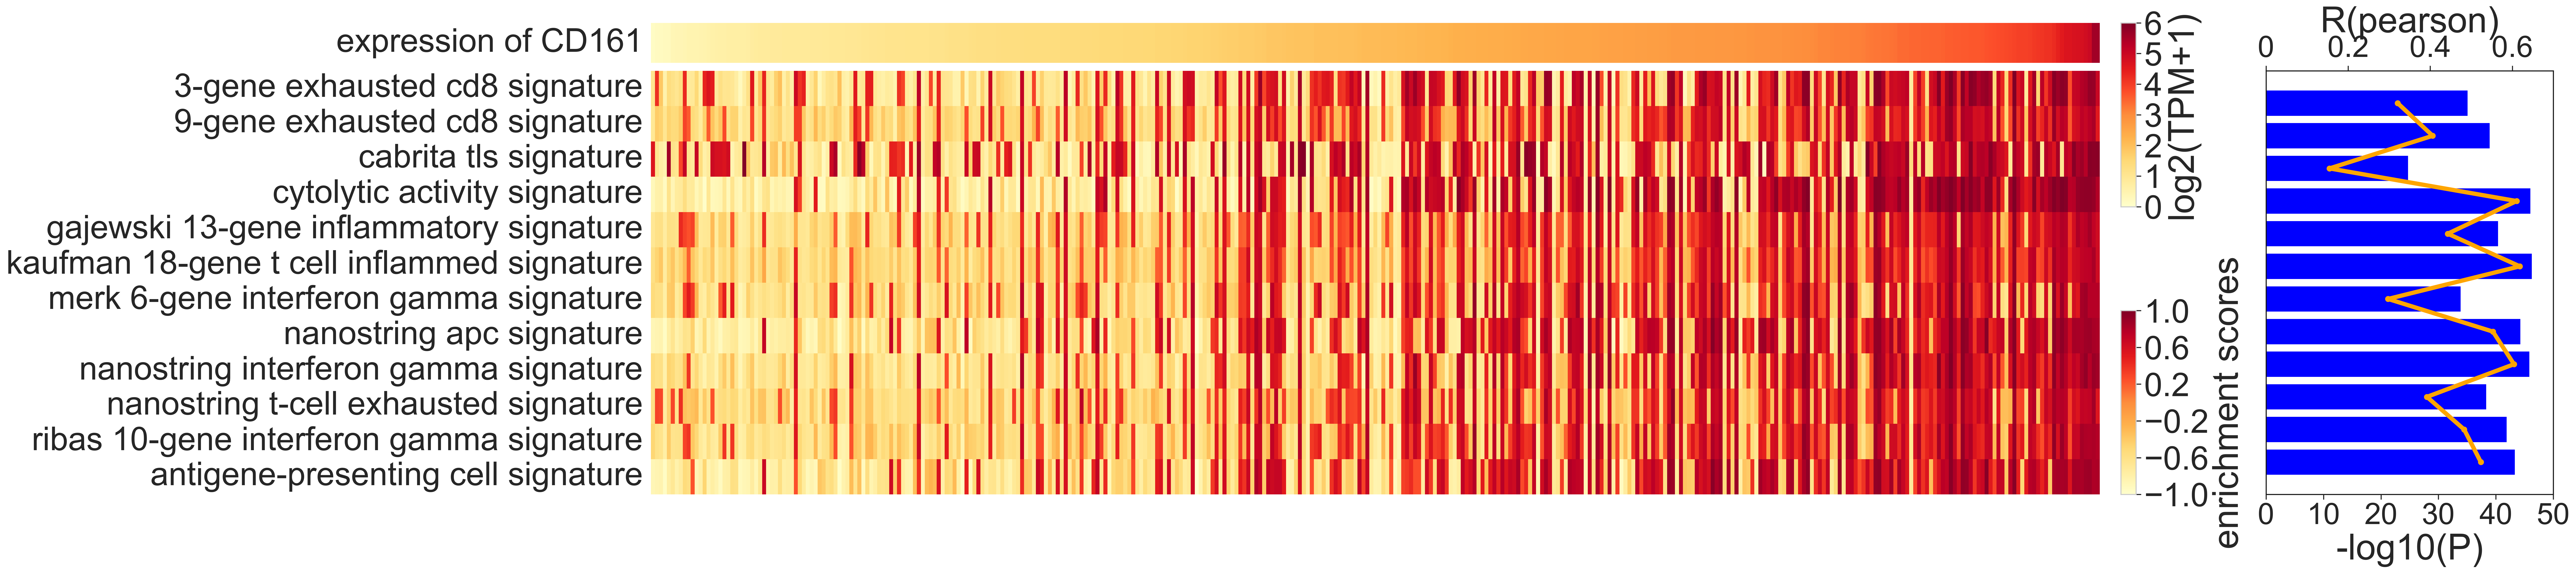

In [9]:
fig = plt.figure(figsize=(40, 12), dpi=300)

grid = plt.GridSpec(12,105)
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_theme(style="whitegrid",font_scale=3.5)

# CD161
plt.subplot(grid[2,:80])
# sns.heatmap(score_merge_df.iloc[0:1, :], cmap='coolwarm', xticklabels='', yticklabels='',center=4, vmin=0, vmax=10)
h1 = sns.heatmap(np.log2(score_merge_df.iloc[0:1, :] + 1), cmap='YlOrRd', xticklabels='', yticklabels=['expression of CD161'], vmin=0, vmax=6, cbar=False)
plt.yticks(rotation=0)

axc1 = plt.subplot(grid[2:6,81:82])
cmap1 = copy.copy(cm.YlOrRd)
norm1 = mcolors.Normalize(vmin=0, vmax=6)
im1 = cm.ScalarMappable(norm=norm1, cmap=cmap1)
cbar1 = fig.colorbar(
    im1, cax=axc1, orientation='vertical',
    ticks=np.linspace(0, 6, 7),
    label='log2(TPM+1)'
)
axc1.grid(False)

# enrichment scores
plt.subplot(grid[3:,:80])
# sns.heatmap(score_merge_df.iloc[1:, :], cmap='coolwarm', xticklabels='', yticklabels=[x[5:] for x in score_merge_df.index[1:]])
h2 = sns.heatmap(score_merge_df.iloc[1:, :], cmap='YlOrRd', xticklabels='', yticklabels=score_merge_df.index[1:], cbar=False)

axc2 = plt.subplot(grid[8:,81:82])
cmap2 = copy.copy(cm.YlOrRd)
norm2 = mcolors.Normalize(vmin=-1, vmax=1)
im2 = cm.ScalarMappable(norm=norm2, cmap=cmap2)
cbar2 = fig.colorbar(
    im2, cax=axc2, orientation='vertical',
    ticks=np.linspace(-1, 1, 6),
    label='enrichment scores'
)
axc2.grid(False)

# pearson
ax1 = plt.subplot(grid[3:, 89:], label="1")
ax1.barh(range(corr_df.shape[0], 0, -1), width=corr_df['cor'], color='blue')
ax1.set_xticks([0,0.2,0.4,0.6])
ax1.set_xticklabels([0,0.2,0.4,0.6], fontdict={'fontsize':35})
ax1.set_xlim(0, 0.7)
ax1.set_yticks([])
ax1.spines['top'].set_color('k')
ax1.spines['bottom'].set_color('k')
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_color('k')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_text('R(pearson)')
ax1.xaxis.set_label_position('top')
ax1.grid(False)

# -log10(P)
ax2 = fig.add_subplot(grid[3:, 89:], label="2", frame_on=False, sharey=ax1)
ax2.plot(corr_df['-log10(P)'], range(corr_df.shape[0], 0, -1), 'o-', color='orange', lw=5)
# ax2.spines['left'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_xticks(range(0, 60, 10))
ax2.set_xticklabels(range(0,60, 10), fontdict={'fontsize':35})
ax2.set_yticks([])
ax2.set_xlabel('-log10(P)')
ax2.grid(False)

plt.savefig("../../../data/GSVA_plot/TCGA-LIHC_GSVA_plot2.pdf", bbox_inches = 'tight')
plt.savefig("../../../data/GSVA_plot/TCGA-LIHC_GSVA_plot2.png", dpi=300, bbox_inches = 'tight')
plt.show()